# Customer relationship management (CRM Analytics)

Customer relationship management (CRM) is the process of managing interactions with existing as well as past and potential customers. It is one of many different approaches that allow a company to manage and analyse its own interactions with its past, current and potential customers. It uses data analysis about customers' history with a company to improve business relationships with customers, specifically focusing on customer retention and ultimately driving sales growth.

One important aspect of the CRM approach is the systems of CRM compile data from a range of different communication channels, including a company's website, telephone, email, live chat, marketing materials and more recently, social media. Through the CRM approach and the systems used to facilitate it, businesses learn more about their target audiences and how to best cater for their needs.

In [2]:
# WITHDRAWING FROM DATABASE ONLY IS SHOWN HERE WITH PYTHON CODES.

# credentials.
# creds = {'user': 'WRITE user',
#          'passwd': 'WRITE passwoord',
#          'host': 'WRITE host',
#          'port': ----,
#          'db': 'WRITE Database'}

# # MySQL conection string.
# connstr = 'mysql+mysqlconnector://{user}:{passwd}@{host}:{port}/{db}'

# # sqlalchemy engine for MySQL connection.
# conn = create_engine(connstr.format(**creds))

# retail_mysql_df = pd.read_sql_query("select * from online_retail_2010_2011", conn)
# retail_mysql_df.info()

# retail_mysql_df["InvoiceDate"] = pd.to_datetime(retail_mysql_df["InvoiceDate"])

In [3]:
print(14 * " >", "\t\t n.B.a. \t", "< " * 14, "\n\n\n")

import pandas as pd
import gc
import time
from contextlib import contextmanager
from helpers.helpers import get_namespace, check_df, outlier_thresholds, replace_with_thresholds,\
crm_data_prep, create_rfm, create_cltv_c, create_cltv_p

import sys
sys.argv = [sys.argv[0]]

pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 15)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.expand_frame_repr', True)


@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s\n\n".format(title, time.time() - t0))


def main(debug=False):
    with timer("Reading data ..."):
        df_ = pd.read_excel("online_retail_II.xlsx", sheet_name="Year 2010-2011")
        df = df_.copy()
        gc.collect()

    with timer("Checking Data ..."):
        # Check data
        df_prep = check_df(df)
        gc.collect()

    with timer("Data Pre-Processing ..."):
        # df preperation
        df_prep = crm_data_prep(df)
        gc.collect()

    with timer("RFM Segmentation Performing ..."):
        # RFM Segmentation
        rfm = create_rfm(df_prep)
        gc.collect()
        
    with timer("cltv_c (CLTV Calculate) Calculating ..."):
        rfm_cltv_c = create_cltv_c(rfm)
        gc.collect()
    
    with timer("cltv_p (CLTV Predict) Calculating ..."):
        rfm_cltv_p = create_cltv_p(df_prep)
        
        # yukarida olusan cltv_c ile cltv_p leri birlestirelim
        crm_final = rfm_cltv_c.merge(rfm_cltv_p, on="Customer ID", how="left")
        
        # yeni müşterilere değer biçip nasıl odaklanılacağına yönelik yol gösterir. Ondan cltv_p ye gore siralama yapalim
        print("CRM Final First 5 Observe: \n", crm_final.sort_values(by="cltv_p", ascending=False).head())
        gc.collect()
        


if __name__ == "__main__":
    namespace = get_namespace()

    with timer("Full model run"):
        main(debug=True)


 > > > > > > > > > > > > > > 		 n.B.a. 	 < < < < < < < < < < < < < <  



Reading data ... - done in 158s



        ##################### Shape #####################

	(541910, 8)


        ##################### Types #####################

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object


        ##################### Head #####################

  Invoice StockCode                         Description  Quantity  \
0  536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1  536365     71053                 WHITE METAL LANTERN         6   
2  536365    84406B      CREAM CUPID HEARTS COAT HANGER         8   

          InvoiceDate  Price  Customer ID         Country  
0 2010-12-01 08:26:00  2.550    17850.000  United Kingdom  
1 2010-12-01 08:26:00  3.390    17850.000  Unit

In [ ]:
##########################################
# SEND DATABASE with PYTHON
##########################################


# # Customer ID arıza çıkarmasın diye birleşik yazalım.
# crm_final.index.name = "CustomerID"

# crm_final.to_sql(name='crm_final',
#                  con=conn,
#                  if_exists='replace',
#                  index=True,  # index var o da aşağıdaki
#                  index_label="CustomerID")


# Conclusion

    After this notebook, my aim is try to further develop my other works.

    If you have any suggestions, please could you write for me? I wil be happy for comment and critics!

    Thank you for your suggestion and votes ;)



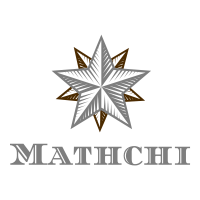

In [27]:
from IPython.display import Image
Image("mathchi.png")